In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np

import math
import torch
!pip install gpytorch
import gpytorch
from matplotlib import pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.7/156.7 kB 14.7 MB/s eta 0:00:00


In [2]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

# Download Yield curve from Treasury data

In [3]:
res = requests.get("https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2023")
html = BeautifulSoup(res.text, "lxml")

link = html.find("div", {"class": "csv-feed views-data-export-feed"}).find("a").get("href")
link

'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/2023/all?type=daily_treasury_yield_curve&field_tdr_date_value=2023&page&_format=csv'

In [4]:
df_list = []
START = 2010
END = 2018

 
for year in range(START,END):
    print(f"Scraping for {year}")
    response = requests.get(link.replace("2023", str(year))).text.split("\n")
 
    list_table = [[*row.split(",")] for row in response[1:]]
 
    df_year_i = pd.DataFrame(list_table, columns=response[0].split(","))
    df_year_i.columns = df_year_i.columns.str.strip('"')
    df_list.append(df_year_i)

df_all = pd.concat(df_list)
df_all.index = pd.DatetimeIndex(df_all["Date"])

#cast to numeric
cast_cols = df_all.columns.drop('Date')
df_all[cast_cols] = df_all[cast_cols].apply(pd.to_numeric, errors='coerce')

print (f"Scraped data shape={df_all.shape}")

Scraping for 2010
Scraping for 2011
Scraping for 2012
Scraping for 2013
Scraping for 2014
Scraping for 2015
Scraping for 2016
Scraping for 2017
Scraped data shape=(2003, 12)


In [5]:
df_all.head()

,Date,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2010-12-31,12/31/2010,0.07,0.12,0.19,0.29,0.61,1.02,2.01,2.71,3.30,4.13,4.34
2010-12-30,12/30/2010,0.05,0.12,0.20,0.29,0.66,1.07,2.06,2.76,3.38,4.21,4.43
2010-12-29,12/29/2010,0.05,0.13,0.20,0.30,0.64,1.05,2.03,2.75,3.35,4.19,4.41
2010-12-28,12/28/2010,0.08,0.15,0.21,0.31,0.75,1.17,2.18,2.89,3.50,4.33,4.53
2010-12-27,12/27/2010,0.06,0.17,0.22,0.32,0.71,1.11,2.08,2.76,3.36,4.20,4.42


In [6]:
df_all.isna().mean()

Date     0.000000
1 Mo     0.000499
3 Mo     0.000499
6 Mo     0.000499
1 Yr     0.000499
2 Yr     0.000499
3 Yr     0.000499
5 Yr     0.000499
7 Yr     0.000499
10 Yr    0.000499
20 Yr    0.000499
30 Yr    0.000499
dtype: float64

<Axes: xlabel='Date'>

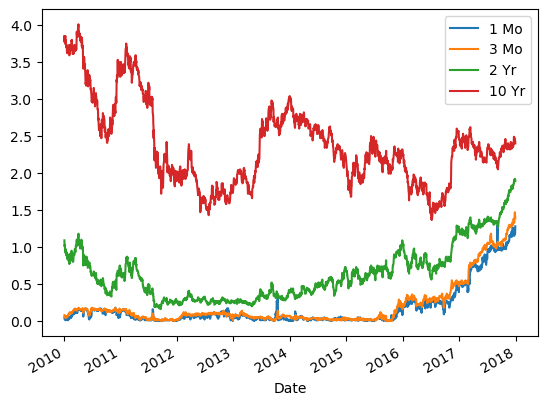

In [7]:
df_all[["1 Mo","3 Mo","2 Yr", "10 Yr"]].plot()

In [8]:
df_clean = df_all.dropna()
print (f"data shape after removing nan ={df_clean.shape}")

data shape after removing nan =(2002, 12)


In [9]:
df_clean.to_csv(f"yield_curve_{START}_{END}.csv")